In [116]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
import collections

In [117]:
invasion_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
operative_information_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [118]:
invasion_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [119]:
X = invasion_data.drop('class', axis=1)
y = invasion_data['class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [120]:
clf_rf = RandomForestClassifier()

In [121]:
params = {'n_estimators': range(1, 12),
          'max_depth': range(1, 5),
          'min_samples_leaf': range(1, 4),
          'min_samples_split': range(2, 7, 2)}

In [122]:
grid_search = GridSearchCV(clf_rf, params, cv=5, n_jobs=-1)

In [123]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 7, 2),
                         'n_estimators': range(1, 12)})

In [124]:
grid_search.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 3}

In [125]:
best_clf = grid_search.best_estimator_
# best_clf.score(X_test, y_test)

In [126]:
prediction = best_clf.predict(operative_information_data)
prediction

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [127]:
pd.Series(prediction).value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

In [128]:
collections.Counter(prediction)

Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})

In [129]:
feature_importances_data = pd.DataFrame({'importances': best_clf.feature_importances_},
                                        index=X.columns).sort_values('importances')
feature_importances_data

,importances
time_of_observance,0.000000
i_reflection,0.002364
speed,0.206089
g_reflection,0.215411
brightness,0.219292
volume,0.356844


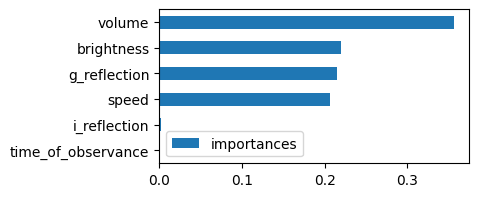

In [130]:
feature_importances_data.plot(kind='barh', figsize=(4, 2));